In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

Firstly, we fetch the california housing data set using the sklearn library. The dataset retrieved is in a bundle format.

In [ ]:
uploaded = sklearn.datasets.fetch_california_housing()
uploaded

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

Then we use the '.data' command to retrieve the raw data from the bundle. At this point in time, the data is in a indigestible formart. To fix this, we will turn the data into csv format.

In [ ]:
data = uploaded.data
data

np.savetxt("fetch_california_housing.csv", data, delimiter=",")

data_read = pd.read_csv("fetch_california_housing.csv", header=None)

data_read.rename(columns={0: 'MedInc', 1: 'HouseAge', 2: 'AveRooms', 3: 'AveBedrms', 4: 'Population', 5: 'AveOccup', 6: 'Latituded', 7: 'Longitude'}, inplace=True)

data_read.to_csv('fetch_california_housing.csv', index=False)

data_read

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latituded,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


As you can see from the output above, we have converted the bunch data into csv then into a dataframe. This will enable us to use the pandas library on the data.

Now we can move on to data processing.

Below, we search for missing values in the dataframe using the 'isnull()' function and as per the output there are no missing values.

We found no need to one Hot Encoding because there is no nominal data

In [ ]:
data_read.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latituded     False
Longitude     False
dtype: bool

Now that we are sure our data is complete, we will carry out feature selection. 

To do this, we will use the 'selectKBest()' method from the sklearn.feature_selection
library. We will use this method to do the chi-squared (chi²) statistical test for non-negative features to select 7 of the best features from the dataframe.

This method will score our dataset's features according to relevancy and arrange them in descending order.

In [ ]:
X = data_read.iloc[:,0:7]  #independent columns
y = data_read.iloc[:,-1]    #target column i.e price range
y=y.astype('int')
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 10 best features


     Features          Score
4  Population  390370.170047
1    HouseAge   18386.927668
6   Latituded    2330.851714
2    AveRooms     955.358201
0      MedInc     808.228125
5    AveOccup     633.249926
3   AveBedrms     146.160220


As seen from the output above, Population is our most relevent feature while AveBedrms is our least relevant.

Below, we are simply organizing the dataframe data and giving it's columns their respective labels.

In [ ]:
data_read.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latituded,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now it's time for feature extraction.

 To do this, we will split the dataset into a training and test set.
 
Splitting the dataset into training and test sets will vastly increase our accuracy.
 
We will then use PCA to get the variance that the various features have on the target.

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27707325, 0.19479266, 0.15116061, 0.14289655, 0.13303352,
       0.09200775, 0.00903567])

Assuming population is our target, the output above indicates the variance that each of the features cause on the target.

And from our ealier feature selection output we know what features the values in the array represent. For example 0.00903567 represents AveBedrms 

In order to better visualize the efffects that the attributes have on the target, we can use the seaborn library to generate pairplots graphs. This has been done below.

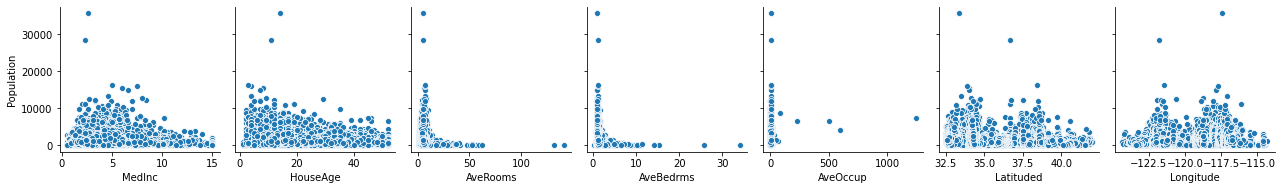

In [ ]:
import seaborn as sns

sns.pairplot(data_read, y_vars=["Population"], x_vars=["MedInc", "HouseAge", "AveRooms", "AveBedrms" , "AveOccup", "Latituded", "Longitude"], dropna = True)

For distribution MedInc = x and population = y: MedInc Causes a large variance on the target


For distribution HouseAge = x and population = y:  AveRooms Causes a small variance on the target


For distribution AveRooms = x and population = y: MedInc Causes a large variance on the target


For distribution AveBedrms = x and population = y: AveBedrms Causes a small variance on the target


For distribution AveOccup = x and population = y: AveOccup Causes a small variance on the target


For distribution Latituded = x and population = y: Latituded Causes a large variance on the target


For distribution Longitude = x and population = y:Longitude Causes a large variance on the target

Now we move on to model selection. We will be testing the following regression models: Logistic regression and KNN regression with K = 5 and K = 1.

First, we are separating the parameters and the target from the dataset into the varables X and y respectively.

In [ ]:
X = data_read.drop('Population', 1)
y = data_read['Population']

Next up, we import the train_test_split library so that we can train and test our models on two seperate datasets for improved accuracy.

In [ ]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)

Below, we have separated the X and y datasets into training and test datasets

In [ ]:
X_train.shape
X_test.shape

(8256, 7)

In [ ]:
y_train.shape
y_test.shape

(8256,)

Now we are performing Logistic Regression on the X and y dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Then we can use the sklearn metrics library to calculate the accuracy of the Logistic Regression Model

In [ ]:
import sklearn.metrics as metrics

y_pred = logreg.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.0008478682170542636

We can now repet the above process for KNN with K = 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#KNN with K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.0006056201550387597

And finally KNN with K = 1

In [ ]:
#KNN with K = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.00048449612403100775

Based off of the accuracy scores of all of the regession models, Logistic Regression is the the most suitable.

Now, in the next step we will carry out hyperparameter tuning using the RandomSearchCV class. 

The reason we use random search is because when you are searching many different parameters in a large dataset all at once, it may become computationally infeasible.

Random search solves this by searching a random subset of the parameters.

So, first we import the RandomizedSearchCV class from sklearn

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Next, we specify the parameter distributions.

In [ ]:
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)

We then fill all the RandonSearchCV class parameters such us: the regression model,the parameter distribution, the cv, the scoring type, the number of combinations the search will try, the random state and so on.

Afterwards we will fit the method with our dataset and get our parameter accuracy results.

In [ ]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X_test, y_test)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


,mean_test_score,std_test_score,params
0,0.000485,0.000593,"{'weights': 'uniform', 'n_neighbors': 36}"
1,0.000606,0.001117,"{'weights': 'distance', 'n_neighbors': 30}"
2,0.000606,0.001117,"{'weights': 'distance', 'n_neighbors': 20}"
3,0.000242,0.000484,"{'weights': 'uniform', 'n_neighbors': 6}"
4,0.000363,0.000555,"{'weights': 'uniform', 'n_neighbors': 49}"
5,0.000727,0.001111,"{'weights': 'distance', 'n_neighbors': 12}"
6,0.000606,0.001117,"{'weights': 'distance', 'n_neighbors': 29}"
7,0.000363,0.000555,"{'weights': 'uniform', 'n_neighbors': 22}"
8,0.000363,0.000555,"{'weights': 'uniform', 'n_neighbors': 29}"
9,0.000606,0.001117,"{'weights': 'distance', 'n_neighbors': 58}"


In [ ]:
rand.best_score_
rand.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

To test the accuracy of our random search method, we will run the search on the same dataset on twenty iterations.

In [ ]:
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X_test, y_test)
    best_scores.append(round(rand.best_score_, 3))
best_scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

[0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001]

As you can see from the output above, the same reult is retrieved at each iteration!


We will now demonstrate the application of cross validation in deducing model accuracy.

For this demonstration, we will use the KNN regression model.

Firstly we will use the cross_val_score library/module to carry out a 5 fold cross validation on the model. 
Using a cv value of 10. An array of ten accuracy values will be generated.

In [ ]:
#KNN with K = 5
from sklearn.model_selection  import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.        , 0.        , 0.        , 0.00096899, 0.        ,
       0.        , 0.        , 0.        , 0.00096899, 0.        ])

Now, for ease of conceptualization, we will get the mean accuracy value as shown below.

In [ ]:
scores.mean()

0.0001937984496124031

Now the question becomes, 'what would happen if we increase the value of K?'

To answer this, we will run a cross validation for K = 1 to K = 60. The result of such an operation would be an array of 59 accuracy results.

This can be accomplished by the use of a simple for loop as shown below.

In [ ]:
k_range = range (1, 60)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())
k_scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

[0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496124031,
 0.0001937984496

In our data set, the accuracy of the cross validation, stays stagnant given 60 folds. This happens because the KNN regression model tested above, has reached its accuracy limit. As shown in the graph below.

Text(0, 0.5, 'Cross-validation accuracy')

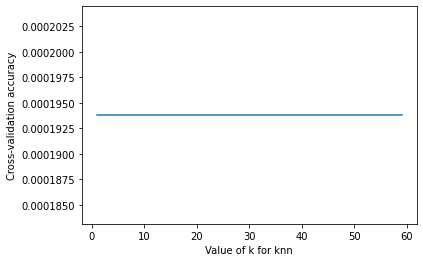

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for knn')
plt.ylabel('Cross-validation accuracy')